In [2]:
import pandas as pd
import numpy  as np

In [58]:
candy=pd.read_csv('candy_choices.csv')
candy.head(20)

,gender,candy,flavor,age,ethnicity,shirt color
0,M,reeses,NaN,26.0,white,red
1,M,kitkat,NaN,32.0,black,green
2,F,airhead,double mystery,26.0,mixed,white
3,M,starburst,red,26.0,white,red
4,F,reeses,NaN,31.0,white,black
5,F,starburst,red,26.0,asian,blue
6,F,hersheys,milk,27.0,asian,white
7,M,airhead,double mystery,23.0,white,black
8,M,starburst,pink,26.0,asian,white
9,M,reeses,NaN,30.0,asian,pink


## Description  of candy  bowl  data :
### The  goal is  to understand  what influences   consumer choice
### Potential  attributes  that   could influence  candy selection are    :
###            i)     Gender , Flavor ,  Age,  Ethnicity
###            ii)    Shirt color  is  a  spurrious attribute that  we agree  is not having  impact.
###            iii)   In this case if  one   the  attributes has a   weaker  relation   then the  shirt color  we could ignore it


# How popular are different brand  of candies ?  Data is ordered   cronological    so   we could have this metrics :
    i) time between selections - also  called  interselection time
    ii)Total number of records  selecting a  candy
    

In [8]:
""" Interselection time :
a,s,h,h,a
0,1.....4
"""

' Interselection time :\na,s,h,h,a\n0,1.....4\n'

In [9]:
np.unique(candy['candy'],return_counts=True)

(array(['airhead', 'hersheys', 'kitkat', 'reeses', 'rolo', 'starburst'], dtype=object),
 array([24, 36, 38, 34, 25, 17]))

<Container object of 6 artists>

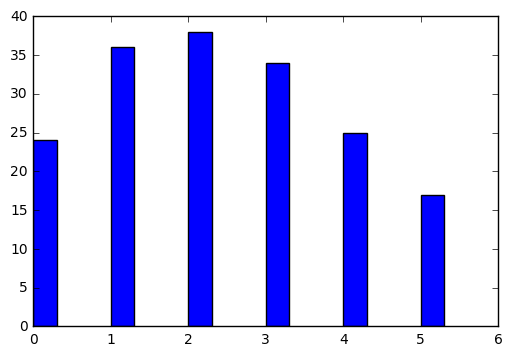

In [19]:
#Total record  of  selected candys
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
#xvals = range(len(np.unique(candy['candy'],return_counts=True)[1]))
plt.bar(xvals,np.unique(candy['candy'],return_counts=True)[1] , width = 0.3)
 

In [30]:
# interselection time :
event_list=[]
i=0
time_since_last={}
for item in candy['candy'].values:
    if item in time_since_last:
        event_list.append((i,item,time_since_last[item]))
    for  e in  time_since_last.keys():
        time_since_last[e]+=1
    time_since_last[item]=0
    i+=1

In [31]:
event_list[:10]

[(4, 'reeses', 3),
 (5, 'starburst', 1),
 (7, 'airhead', 4),
 (8, 'starburst', 2),
 (9, 'reeses', 4),
 (11, 'kitkat', 9),
 (12, 'airhead', 4),
 (13, 'kitkat', 1),
 (14, 'kitkat', 0),
 (15, 'kitkat', 0)]

In [32]:
candy.shape

(174, 6)

In [35]:
candy.head(15)

,gender,candy,flavor,age,ethnicity,shirt color
0,M,reeses,NaN,26.0,white,red
1,M,kitkat,NaN,32.0,black,green
2,F,airhead,double mystery,26.0,mixed,white
3,M,starburst,red,26.0,white,red
4,F,reeses,NaN,31.0,white,black
5,F,starburst,red,26.0,asian,blue
6,F,hersheys,milk,27.0,asian,white
7,M,airhead,double mystery,23.0,white,black
8,M,starburst,pink,26.0,asian,white
9,M,reeses,NaN,30.0,asian,pink


In [36]:
def plot_interselection_time(events, color, candy_name):
    # Pull out the interselection times for the appropriate candy
    candy = [] 
    for (i, choice, time) in events:
        if choice == candy_name:
            candy.append(time)
            
    # Plot the interselection times
    plt.plot(range(len(candy)), candy, color=color, label=candy_name)
    
    # Add a legend and label the axes
    plt.legend(frameon=True, shadow=True, framealpha=0.7, loc=0, prop={'size':14})
    plt.xlabel("Selection number", fontsize=14)
    plt.ylabel("Interselection time", fontsize=14)

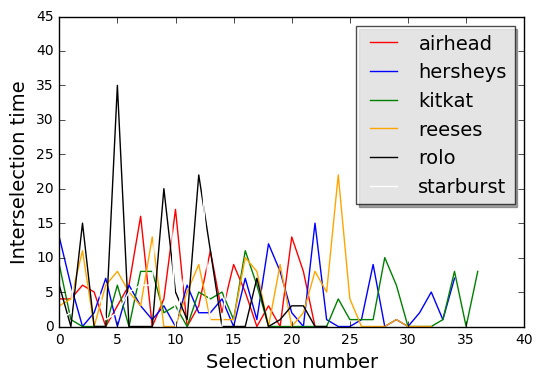

In [53]:
colrs=['red','blue','green','orange','black','white']
i=0
for  c in  list(np.unique(candy['candy'],return_counts=True)[0]):
    plot_interselection_time(event_list, colrs[i], c)
    i=i+1
    

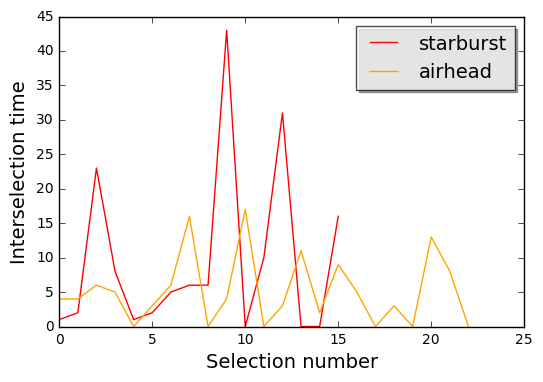

In [54]:
plot_interselection_time(event_list, "red", "starburst")
plot_interselection_time(event_list, "orange", "airhead")

# High   values  represent  lower demand . THis metric looks  promising  on evaluating popularity

# Regression  estimator :
    r:  interselection time for a   candy ,,c''  at a  given  turn
        r will tell us  its  estimate for  an  interselection time  for candy ,, c''  at any give  turn
   Our  data points  are just  the candy selections  adn the order  in which  they where selected with the
   
   interselection time  writtend besided them
   
   x=("airhead",1),("rollo",5),("starbust",7)....
   
   The  estimator  will tell  at a given turn for a given candy  how long  it has been   since it was last selected

In [57]:
candy.shape

(174, 6)

In [61]:
#Each sharedStateEvent will be a map from all candy types to the time since that candy was selected
shared_state_events = [{"airhead":0, "starburst":0, "hersheys":0, "reeses":0, "kitkat":0, "rolo":0}]

df=candy
import copy

i = 0
time_since_last = {}
for item in df["candy"].values:
    if not item in time_since_last:
        time_since_last[item] = 0
    
    event_list.append((i, item, time_since_last[item]))
    
    curr_shared_event = copy.deepcopy(shared_state_events[-1])
    curr_shared_event[item] = time_since_last[item]
    shared_state_events.append(curr_shared_event)
    
    time_since_last[item] = 0
    
    for e in time_since_last.keys():
        if e!=item:
            time_since_last[e]+=1
        
    i = i+1

In [65]:
import pandas
events_frame = pandas.DataFrame(shared_state_events)



In [110]:


events_frame.head(10)



,airhead,hersheys,kitkat,reeses,rolo,starburst
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,3,0,0
6,0,0,0,3,0,1
7,0,0,0,3,0,1
8,4,0,0,3,0,1
9,4,0,0,3,0,2


In [111]:
df.head(10)

,gender,candy,flavor,age,ethnicity,shirt color
0,M,reeses,NaN,26.0,white,red
1,M,kitkat,NaN,32.0,black,green
2,F,airhead,double mystery,26.0,mixed,white
3,M,starburst,red,26.0,white,red
4,F,reeses,NaN,31.0,white,black
5,F,starburst,red,26.0,asian,blue
6,F,hersheys,milk,27.0,asian,white
7,M,airhead,double mystery,23.0,white,black
8,M,starburst,pink,26.0,asian,white
9,M,reeses,NaN,30.0,asian,pink


In [68]:
import random
random.seed(5656)

# Randomly select 30 events for our test set
test_indices = set(random.sample(range(events_frame.shape[0]), 30))

# Split our data into training and test data
train_features = []
train_labels = []
test_features = []
test_labels = []

i = 0
for airhead, hersheys, kitkat, reeses, rolo, starburst in events_frame.values:
    if i in test_indices:
        # Use starburst as our label, and all others as our features
        test_features.append([airhead, hersheys, kitkat, reeses, rolo])
        test_labels.append(starburst)
    else:
        train_features.append([airhead, hersheys, kitkat, reeses, rolo])
        train_labels.append(starburst)
    
    i += 1


In [73]:
 import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model = linear_model.LinearRegression()
model.fit(train_features, train_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
model.coef_

array([ 0.27917575,  0.06709315,  0.23934536, -0.01416615,  0.13528712])

In [105]:
s=zip(events_frame.columns, model.coef_)

In [106]:
for i in range(5):
    print(s.__next__())
 

('airhead', 0.27917574643921622)
('hersheys', 0.067093148933345143)
('kitkat', 0.23934536323789013)
('reeses', -0.014166149813878186)
('rolo', 0.13528711850951042)


In [118]:
 import numpy 
 print(model.score(train_features, train_labels))
 print(numpy.mean((model.predict(test_features) - test_labels) ** 2))

0.0577530174629
19.5789288047


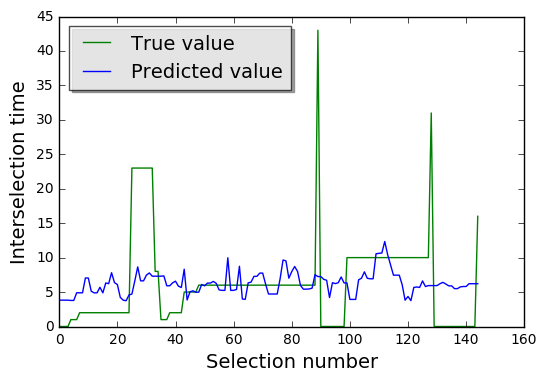

In [108]:
plt.plot(train_labels, color="green", label="True value")
plt.plot(model.predict(train_features), label="Predicted value")

plt.xlabel("Selection number", fontsize=14)
plt.ylabel("Interselection time", fontsize=14)
plt.legend(frameon=True, shadow=True, framealpha=0.7, loc=0, prop={"size": 14})

In [115]:
train_features_res = [[e[0], e[2]] for e in train_features]
train_labels_res = train_labels
test_features_res = [[e[0], e[2]] for e in test_features]
test_labels_res = test_labels
model_res = linear_model.LinearRegression()
model_res.fit(train_features_res, train_labels_res)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

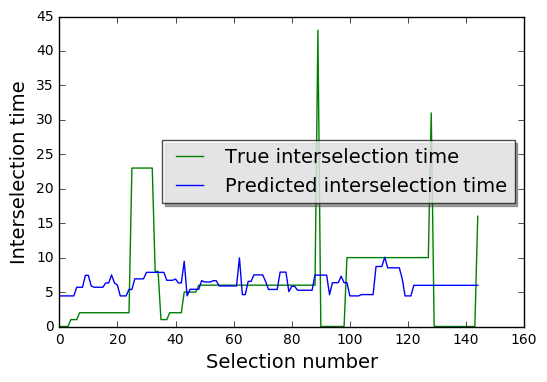

In [116]:
plt.plot(train_labels_res, color="green", label="True interselection time")
plt.plot(model_res.predict(train_features_res), label="Predicted interselection time")

plt.xlabel("Selection number", fontsize=14)
plt.ylabel("Interselection time", fontsize=14)
plt.legend(frameon=True, shadow=True, framealpha=0.7, loc=0, prop={"size": 14})

In [117]:
print(numpy.mean((model_res.predict(test_features_res) - test_labels_res) ** 2))
print(model_res.score(test_features_res, test_labels_res))

21.1088658473
0.0126303589977
